## Домашинее задание
### Группа G1
### Выполнили:

* Акимов Василий Эдуардович
* Бекназаров Назар Сохибжонович
* Бобылев Дмитрий Олегович
* Гусева Полина Александровна


# ЧАСТЬ 1
Скачайте прочтения, указанные для вашей группы, так, как было показано на практическом занятии. Учтите, что для правильного скачивания парно-концевых прочтений (в два отдельных файла) необходимо указать правильный флаг в fastq-dump.

In [ ]:
%%bash
# Установка всех программ
curl -O https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-x86_64.sh
sh Miniconda3-latest-MacOSX-x86_64.sh
conda config --add channels defaults
conda config --add channels bioconda
conda config --add channels conda-forge
conda install samtools
conda install minimap2
conda install sra-tools

# Загрузка всех датасетов
fastq-dump -I --split-files SRR12444881
fastq-dump -I --split-files SRR12444880


# Часть 2
Используя программу filtlong, выберите из длинных прочтений самые длинные, суммарной длиной не более 400 миллионов п.н. 

In [ ]:
%%bash
# Длинные прочтения только в SRR12444881_1, поэтому filtlong применяем только в этому файлу
filtlong --target_bases 400000000 SRR12444881_1.fastq > SRR12444881_1_cut.fastq

# Часть 3
Используя программу unicycler, соберите геном бактерии из выбранных длинных и всех коротких прочтений, в гибридном режиме. 


In [ ]:
%%bash
# Запускаем на всех ядрах на сервере в гибридном (на длинных и коротких) прочтениях
unicycler -1 SRR12444880_1.fastq -2 SRR12444880_2.fastq -l SRR12444881_1_cut.fastq -o assembl -t 32

# Часть 4
Используя NCBI Blast, определите, к какому виду принадлежит собранная бактерия. 

Поиск по Blast выдал огранизм Salmonella enterica subsp.

* https://www.ncbi.nlm.nih.gov/nucleotide/CP060168.1?report=genbank&log$=nuclalign&blast_rank=3&RID=V2EJ6W05013

Если произвести поиск SRX по выданным на группу SRR то получим аналогичные результаты:
* https://www.ncbi.nlm.nih.gov/sra/SRX8939425
* https://www.ncbi.nlm.nih.gov/sra/SRX8939426

То есть сборка прошла успешно и ответ верный!

# Часть 5
Визуализируйте сборку при помощи программы Bandage.


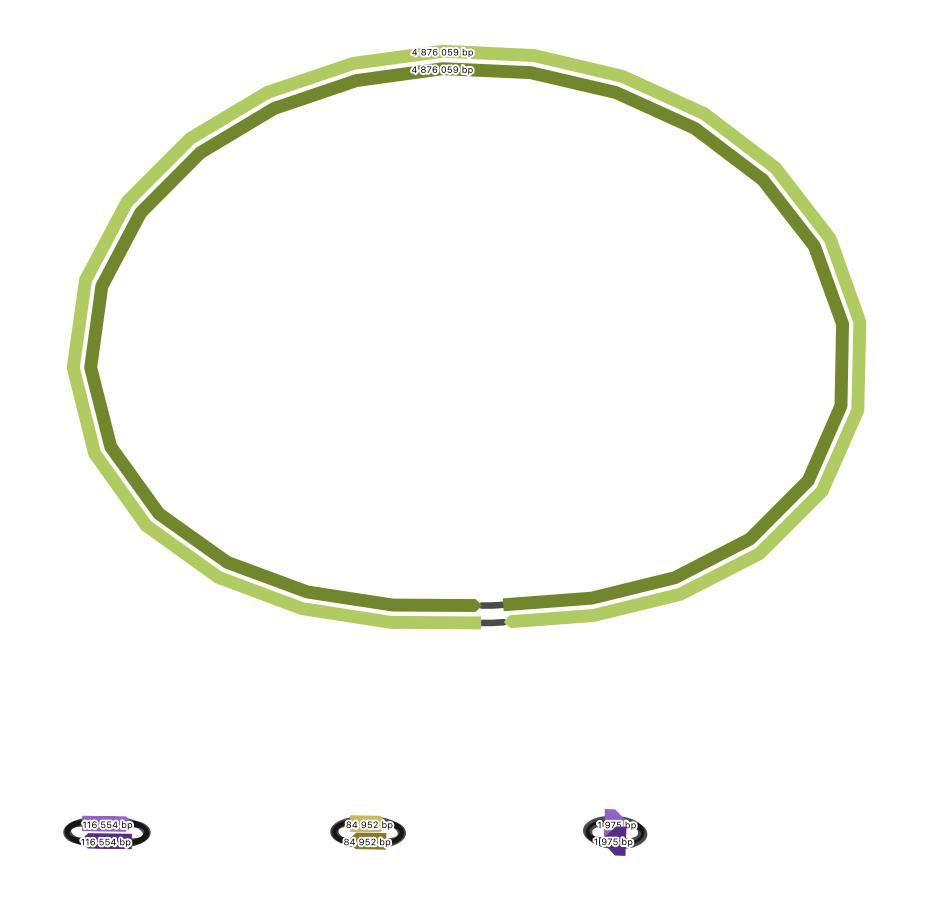

In [3]:
from IPython.display import Image
Image("Bandage.jpg")

# Часть 6

Найдите в вашей сборке гены антибиотикорезистентности и вирулентности. Используйте для этого программу abricate. Попробуйте все прилагаемые базы данных.


In [ ]:
%%bash
conda install -c conda-forge -c bioconda -c defaults abricate

In [15]:
%%bash
abricate --list

DATABASE	SEQUENCES	DBTYPE	DATE
card	2631	nucl	2020-Apr-19
ecoli_vf	2701	nucl	2020-Apr-19
plasmidfinder	460	nucl	2020-Apr-19
ecoh	597	nucl	2020-Apr-19
ncbi	5386	nucl	2020-Apr-19
resfinder	3077	nucl	2020-Apr-19
vfdb	2597	nucl	2020-Apr-19
megares	6635	nucl	2020-Apr-19
argannot	2223	nucl	2020-Apr-19


In [17]:
%%bash
# Делаем поиск по всем базам данных
abricate assembly/assembly.fasta -db card > card.csv
abricate assembly/assembly.fasta -db ecoli_vf > ecoli_vf.csv
abricate assembly/assembly.fasta -db plasmidfinder > plasmidfinder.csv
abricate assembly/assembly.fasta -db ecoh > ecoh.csv
abricate assembly/assembly.fasta -db ncbi > ncbi.csv
abricate assembly/assembly.fasta -db resfinder > resfinder.csv
abricate assembly/assembly.fasta -db vfdb > vfdb.csv
abricate assembly/assembly.fasta -db megares > megares.csv
abricate assembly/assembly.fasta -db argannot > argannot.csv

Using nucl database card:  2631 sequences -  2020-Apr-19
Processing: assembly/assembly.fasta
Found 34 genes in assembly/assembly.fasta
Tip: have a suggestion for abricate? Tell me at https://github.com/tseemann/abricate/issues
Done.
Using nucl database ecoli_vf:  2701 sequences -  2020-Apr-19
Processing: assembly/assembly.fasta
Found 41 genes in assembly/assembly.fasta
Tip: have a suggestion for abricate? Tell me at https://github.com/tseemann/abricate/issues
Done.
Using nucl database plasmidfinder:  460 sequences -  2020-Apr-19
Processing: assembly/assembly.fasta
Found 3 genes in assembly/assembly.fasta
Tip: remember that abricate is unable to find AMR-mediated SNPs.
Done.
Using nucl database ecoh:  597 sequences -  2020-Apr-19
Processing: assembly/assembly.fasta
Found 0 genes in assembly/assembly.fasta
Tip: did you know? abricate was named after 'A'nti 'B'acterial 'R'esistiance
Done.
Using nucl database ncbi:  5386 sequences -  2020-Apr-19
Processing: assembly/assembly.fasta
Found 8 

# Часть 7
Сделайте отчет в виде репозитория на GitHub. В отчете, отформатированном в markdown, приведите: 1) код всех выполненных в терминале команд с комментариями; 2) картинку с визуализацией из Bandage; 3) таблицу с описанием найденных генов резистентности и вирулентности. 


In [24]:
import pandas as pd
import os

pd.options.display.max_rows = 300


In [25]:
pd.concat([pd.read_csv(file, sep="\t") for file in [i for i in os.listdir('.') if i.endswith("csv")]])

,#FILE,SEQUENCE,START,END,STRAND,GENE,COVERAGE,COVERAGE_MAP,GAPS,%COVERAGE,%IDENTITY,DATABASE,ACCESSION,PRODUCT,RESISTANCE
0,assembly/assembly.fasta,2,75507,76367,+,blaTEM-1,1-861/861,===============,0/0,100.00,100.00,ncbi,NG_050145.1,class A broad-spectrum beta-lactamase TEM-1,BETA-LACTAM
1,assembly/assembly.fasta,2,79584,80399,+,sul2,1-816/816,===============,0/0,100.00,99.88,ncbi,NG_048118.1,sulfonamide-resistant dihydropteroate synthase...,SULFONAMIDE
2,assembly/assembly.fasta,2,80436,81263,+,aph(3'')-Ib,1-828/828,===============,0/0,100.00,100.00,ncbi,NG_056002.2,aminoglycoside O-phosphotransferase APH(3'')-Ib,STREPTOMYCIN
3,assembly/assembly.fasta,2,81263,82099,+,aph(6)-Id,1-837/837,===============,0/0,100.00,100.00,ncbi,NG_047464.1,aminoglycoside O-phosphotransferase APH(6)-Id,STREPTOMYCIN
4,assembly/assembly.fasta,2,83346,83819,+,dfrA1,1-474/474,===============,0/0,100.00,99.79,ncbi,NG_047677.1,trimethoprim-resistant dihydrofolate reductase...,TRIMETHOPRIM
5,assembly/assembly.fasta,2,83912,84703,+,aadA1,1-792/792,===============,0/0,100.00,99.87,ncbi,NG_052230.1,ANT(3'')-Ia family aminoglycoside nucleotidylt...,STREPTOMYCIN
6,assembly/assembly.fasta,2,85208,86047,+,sul1,1-840/840,===============,0/0,100.00,100.00,ncbi,NG_048082.1,sulfonamide-resistant dihydropteroate synthase...,SULFONAMIDE
7,assembly/assembly.fasta,2,92120,92779,+,catA1,1-660/660,===============,0/0,100.00,99.85,ncbi,NG_047582.1,type A-1 chloramphenicol O-acetyltransferase,CHLORAMPHENICOL
0,assembly/assembly.fasta,1,44153,45338,-,EMRD,6-1191/1191,========/======,2/2,99.50,83.74,megares,MEG_2729,Multi-compound:Drug_and_biocide_resistance:Dru...,NaN
1,assembly/assembly.fasta,1,428525,429157,-,CRP,1-633/633,===============,0/0,100.00,87.84,megares,MEG_2132,Multi-compound:Drug_and_biocide_resistance:Dru...,NaN
